In [1]:
#importing necessary libraries

import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
udf = pd.read_csv('udemy1.csv')

In [3]:
udf.head()

,category,title,short_decs,rating,student_num,points,creator,language,last_update,price,duration,long_desc,url
0,Development > No-Code Development > Web Develo...,Découvrez comment faire votre projet avec des ...,"En une heure, initiez-vous aux technologies no...",4.2,878 students,72,Team Contournement,French,NaN,NaN,NaN,"Dans ce cours gratuit d'une heure, nous vous p...",https://www.udemy.com/course/decouvrez-comment...
1,IT & Software > IT Certifications > AWS Certif...,Cloud's Roles Definition and AWS Roadmap,المسميات الوظيفية و خارطة الشهادات في امزون كلاود,4.6,177 students,6,Abdullah Abdulazeez Mohammed,Arabic,NaN,NaN,NaN,افضل مسارين في الكلاود.. المسميات الوظيفية و خ...,https://www.udemy.com/course/clouds-roles-defi...
2,IT & Software > IT Certifications > AWS Certif...,Mini Simulado AWS Certified Cloud Practitioner...,Teste o seu conhecimento AWS Cloud Practitione...,4.5,"7,245 students",490,Eduardo Lara,Portuguese,NaN,NaN,NaN,O mercado de tecnologia na área de. infraestru...,https://www.udemy.com/course/mini-simulado-aws...
3,IT & Software > IT Certifications > AWS Certif...,AWS Certified Solutions Architect Professional...,Examen de practica,0.0,4 students,0,Certification_Center Certification_Center,Spanish,Last updated 3/2022,$19.99,NaN,¿Conoces la mejor manera de aprender es comete...,https://www.udemy.com/course/aws-certified-sol...
4,IT & Software > IT Certifications > AWS Certif...,The Ultimate AWS Certified Solutions Architect...,Pass the AWS certification exam by mastering t...,4.2,"9,172 students","1,465",Bernard Golden,English,Last updated 2/2019,$17.99,27 hours on-demand video,"""Strongly recommended. More effective than man...",https://www.udemy.com/course/the-ultimate-aws-...


# Data Cleaning and Preparation

In [4]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     462 non-null    object 
 1   title        465 non-null    object 
 2   short_decs   462 non-null    object 
 3   rating       449 non-null    float64
 4   student_num  449 non-null    object 
 5   points       449 non-null    object 
 6   creator      462 non-null    object 
 7   language     462 non-null    object 
 8   last_update  443 non-null    object 
 9   price        430 non-null    object 
 10  duration     152 non-null    object 
 11  long_desc    452 non-null    object 
 12  url          466 non-null    object 
dtypes: float64(1), object(12)
memory usage: 47.5+ KB


In [11]:
#dropping the duration column
udf.drop('duration', axis=1, inplace=True)

KeyError: "['duration'] not found in axis"

In [12]:
udf.dropna(inplace = True)

In [13]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 3 to 465
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     420 non-null    object 
 1   title        420 non-null    object 
 2   short_decs   420 non-null    object 
 3   rating       420 non-null    float64
 4   student_num  420 non-null    object 
 5   points       420 non-null    object 
 6   creator      420 non-null    object 
 7   language     420 non-null    object 
 8   last_update  420 non-null    object 
 9   price        420 non-null    object 
 10  long_desc    420 non-null    object 
 11  url          420 non-null    object 
dtypes: float64(1), object(11)
memory usage: 42.7+ KB


In [14]:
#removing the word 'students' from the student_num column
udf['student_num'] = udf['student_num'].str.replace('students', '')
udf['student_num'] = udf['student_num'].str.replace('student', '')

In [15]:
#removing commas from the student_num column
udf['student_num'] = udf['student_num'].str.replace(',', '')

In [16]:
#converting the student_num column to integers
udf['student_num'] = udf['student_num'].astype(int)

In [17]:
#removing commas and converting the dtype of points to int
udf['points'] = udf['points'].str.replace(',', '')
udf['points'] = udf['points'].astype(int)

In [18]:
#removing the dollar sign and converting the dtype to float
udf['price'] = udf['price'].str.replace('$', '')
udf['price'] = udf['price'].astype(float)

In [20]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 3 to 465
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     420 non-null    object 
 1   title        420 non-null    object 
 2   short_decs   420 non-null    object 
 3   rating       420 non-null    float64
 4   student_num  420 non-null    int32  
 5   points       420 non-null    int32  
 6   creator      420 non-null    object 
 7   language     420 non-null    object 
 8   last_update  420 non-null    object 
 9   price        420 non-null    float64
 10  long_desc    420 non-null    object 
 11  url          420 non-null    object 
dtypes: float64(2), int32(2), object(8)
memory usage: 39.4+ KB


# Data Analysis and Visualization

In [21]:
udf.describe()

,rating,student_num,points,price
count,420.000000,420.000000,420.000000,420.000000
mean,2.964524,5860.038095,654.152381,16.051905
std,1.991738,19108.938389,2712.860496,6.683501
min,0.000000,0.000000,0.000000,13.990000
25%,0.000000,5.000000,0.000000,14.990000
50%,4.000000,93.000000,5.000000,14.990000
75%,4.500000,2134.000000,63.250000,14.990000
max,5.000000,202343.000000,24589.000000,94.990000


## Observations:
#### - The minimum price is 13.99 dollars
#### - The most expensive course has the price of 94.99 dollars
#### - The average price is 16.05 dollars
#### - The average number of students is 5860

In [31]:
udf.head()

,category,title,short_decs,rating,student_num,points,creator,language,last_update,price,long_desc,url
3,IT & Software > IT Certifications > AWS Certif...,AWS Certified Solutions Architect Professional...,Examen de practica,0.0,4,0,Certification_Center Certification_Center,Spanish,Last updated 3/2022,19.99,¿Conoces la mejor manera de aprender es comete...,https://www.udemy.com/course/aws-certified-sol...
4,IT & Software > IT Certifications > AWS Certif...,The Ultimate AWS Certified Solutions Architect...,Pass the AWS certification exam by mastering t...,4.2,9172,1465,Bernard Golden,English,Last updated 2/2019,17.99,"""Strongly recommended. More effective than man...",https://www.udemy.com/course/the-ultimate-aws-...
5,IT & Software > IT Certifications > AWS Certif...,【2022年版・Part1】AWS認定クラウドプラクティショナー 模擬問題集（325問 5セ...,本番試験レベルの問題325問と、正答につながる155個のキーフレーズ集で、効率的に資格取得が...,0.0,11,0,Clouds Starter,Japanese,Last updated 2/2022,14.99,出題範囲に完全対応した模擬問題集！. AWS認定クラウドプラクティショナーの本番レベルの模擬...,https://www.udemy.com/course/2022part1aws-5-325/
6,IT & Software > IT Certifications > AWS Certif...,Simulado AWS (Cloud Practitioner | Solutions A...,você aprenderá assimilar melhor as provas da A...,0.0,0,0,Marcio dos Santos Muniz,Portuguese,Last updated 12/2021,14.99,Com este simulado você poderá adquirir grande ...,https://www.udemy.com/course/simulado-aws-clou...
7,IT & Software > IT Certifications > AWS Certif...,Guia definitivo para Certificação AWS Architec...,Guia definitivo para AWS Certified Solutions A...,0.0,1,0,Eduardo Cunha,Portuguese,Last updated 11/2021,14.99,Aqui não tem qualquer simulado da AWS!. Garant...,https://www.udemy.com/course/guia-definitivo-p...


In [32]:
languages = udf.groupby(['language'])

In [33]:
languages.size()

language
Arabic          7
Azeri           2
English       320
French          7
Gujarati        1
Hindi           3
Indonesian      1
Japanese        7
Korean          5
Polish          1
Portuguese     36
Russian         3
Spanish        21
Turkish         5
Vietnamese      1
dtype: int64

### Most of the courses are provided in English language

<AxesSubplot:xlabel='language'>

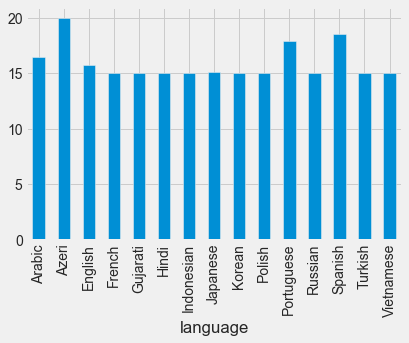

In [70]:
#showing the average price by language
languages['price'].mean().plot.bar()

<AxesSubplot:xlabel='price', ylabel='points'>

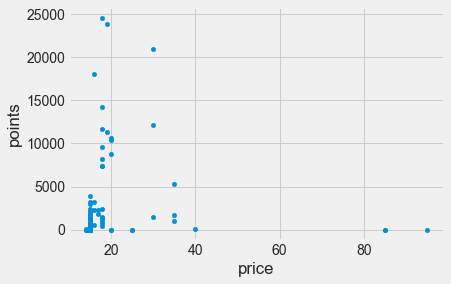

In [58]:
udf.plot.scatter(x='price', y='points')

<AxesSubplot:xlabel='price', ylabel='rating'>

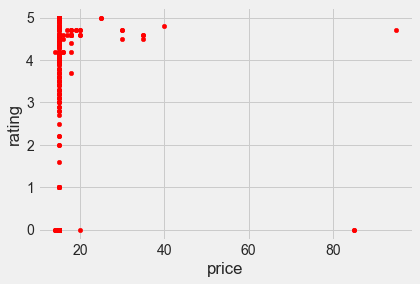

In [59]:
udf.plot.scatter(x='price', y='rating', c='r')

<AxesSubplot:>

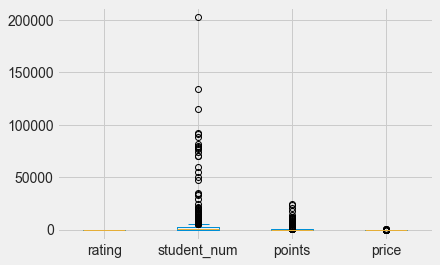

In [60]:
udf.plot.box()

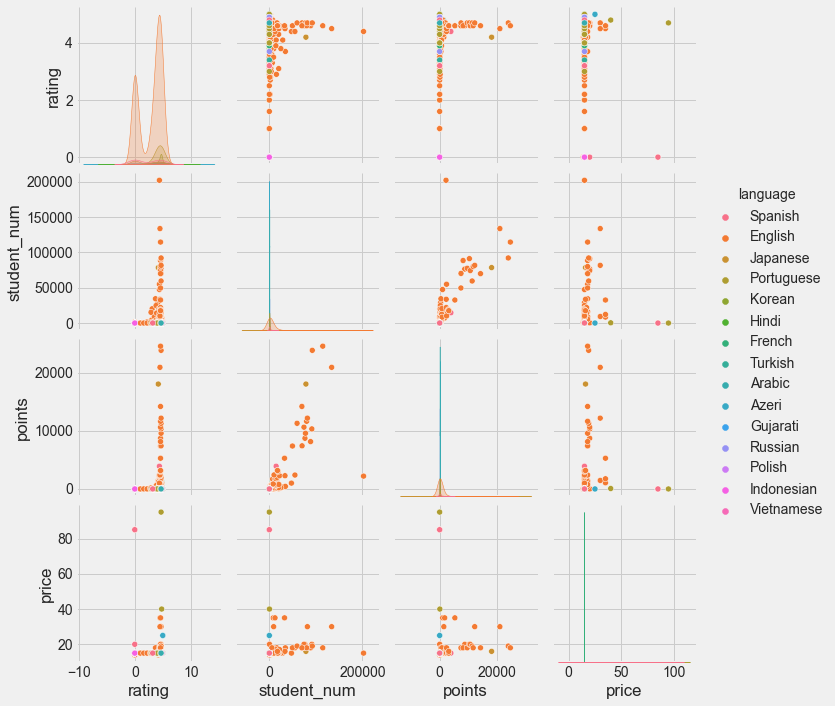

In [62]:
sns.pairplot(data=udf, kind='scatter', hue='language')

<AxesSubplot:>

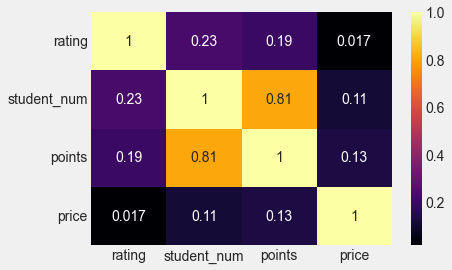

In [64]:
sns.heatmap(udf.corr(), annot=True, cmap='inferno')

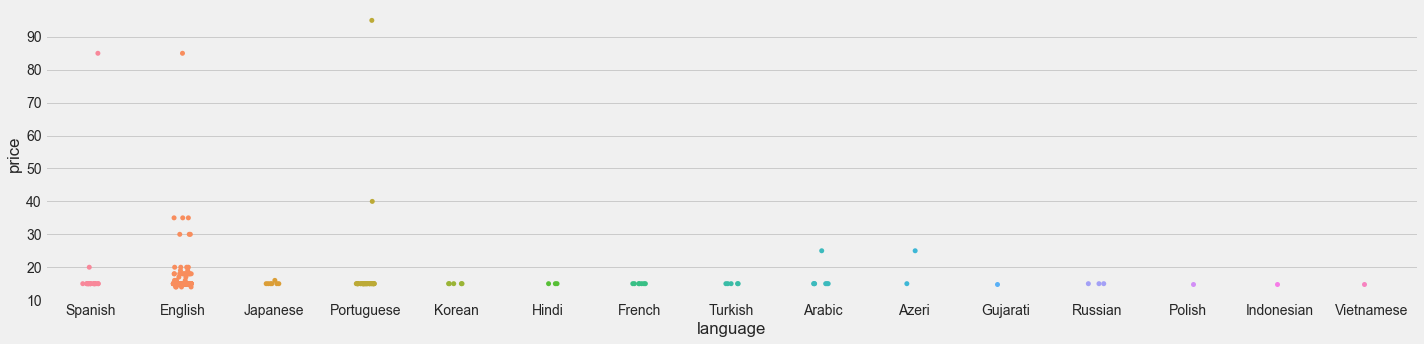

In [72]:
sns.catplot(x='language', y='price', data=udf, aspect=4)

### The above catplot shows that the most expensive course was provided in Portuguese. The next categories being Spanish and English

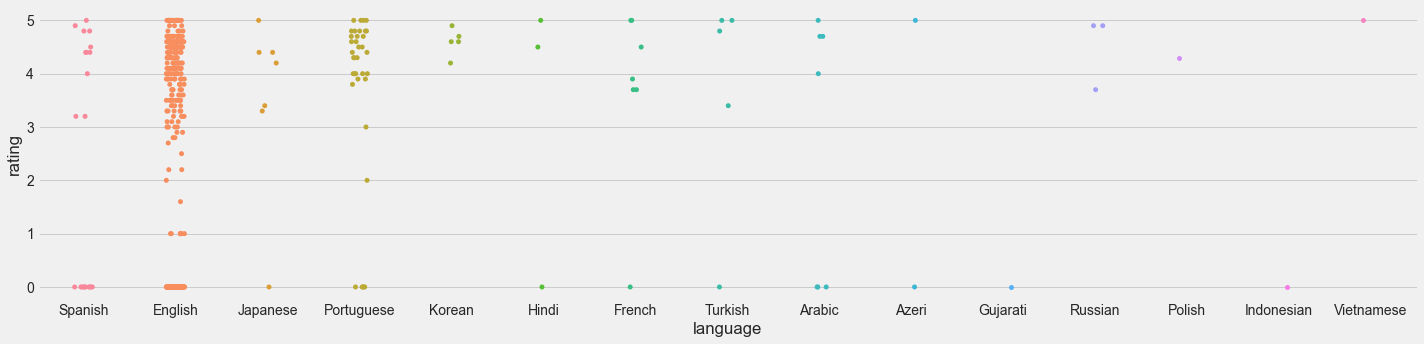

In [74]:
sns.catplot(x='language', y='rating', data=udf, aspect=4)

student_num
0         1.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
91303     4.7
92233     4.7
114751    4.6
133886    4.5
202343    4.4
Name: rating, Length: 241, dtype: float64